## Explanation

After exploring the sklearn logistic regression options, the **final model was selected as: liblinear solver, L1 penalty, 13 features (left out n_C, n_H, n_P, MW), balanced class weights.**

Explorations in this notebook include: solver, penalty, recursive feature elimination (RFE. Features were eliminated based on their score in RFE. Lower scores mean the feature was more important to model accuracy.)

**Future work:** A comparison to SVM would be useful. A gridsearch parameter exploration would also be useful.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt


In [2]:
master_df = pd.read_csv('../datasets/MASTER_DF.csv')

In [3]:
feature_df = master_df[['PubChem', 'dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
        'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU']]
feature_df.set_index(keys=['PubChem'], inplace=True)
feature_df.head()

,dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7,n_O,n_N,n_P,n_S,n_X,DoU
PubChem,,,,,,,,,,,,,,
3394,0.000000,1,0,0,0,0,0,0,3.0,0.0,0.0,1.0,0.0,0.0
3394,0.511007,1,0,0,0,0,0,0,3.0,0.0,0.0,1.0,0.0,0.0
3578,0.000000,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3578,0.241667,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3578,0.294605,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
full_feature = master_df[['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW']]
full_feature.head()

full_features = np.array(full_feature) #shape balance array for regression
full_reactions = list(master_df['reacts'])

full_feature_train, full_feature_test, full_reaction_train, full_reaction_test = train_test_split(full_features, full_reactions,
                                                    test_size=0.20, random_state=42)

In [5]:
features = np.array(feature_df) #shape balance array for regression
reactions = list(master_df['reacts'])

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                    test_size=0.20, random_state=42)

/Users/stephenblaskowski/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


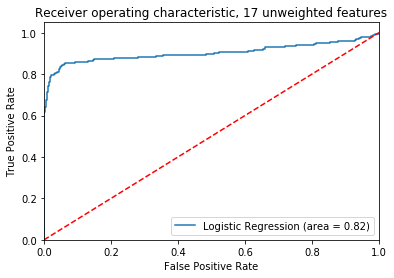

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      1064
         1.0       0.97      0.64      0.77       312

   micro avg       0.91      0.91      0.91      1376
   macro avg       0.94      0.82      0.86      1376
weighted avg       0.92      0.91      0.91      1376
 Score =  0.9142441860465116


In [6]:
# logistic regression on default unweighted 17 features

logreg1=linear_model.LogisticRegression(random_state=1)        
logreg1.fit(full_feature_train, np.ravel(full_reaction_train)) 
score = logreg1.score(full_feature_test, full_reaction_test)

predictions1 = logreg1.predict(full_feature_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg1.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg1.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 unweighted features')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions1), 'Score = ', score)


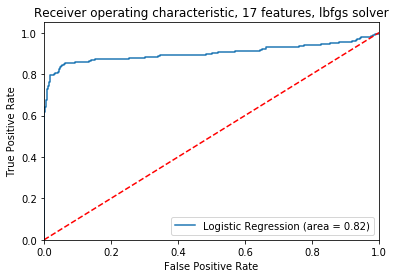

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1064
         1.0       0.97      0.64      0.77       312

   micro avg       0.91      0.91      0.91      1376
   macro avg       0.94      0.82      0.86      1376
weighted avg       0.92      0.91      0.91      1376



In [7]:
# all features, change the solver 
logreg4 = linear_model.LogisticRegression(solver='lbfgs', max_iter=100000)
logreg4.fit(full_feature_train, np.ravel(full_reaction_train))
predictions4 = logreg4.predict(full_feature_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg4.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg4.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features, lbfgs solver')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions4))

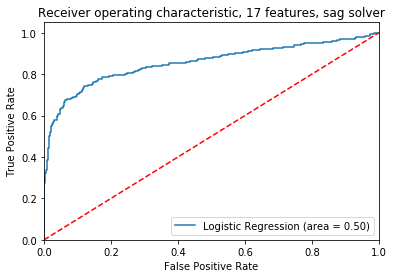

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1064
         1.0       0.00      0.00      0.00       312

   micro avg       0.77      0.77      0.77      1376
   macro avg       0.39      0.50      0.44      1376
weighted avg       0.60      0.77      0.67      1376



/Users/stephenblaskowski/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
# all features, change the solver again
logreg3 = linear_model.LogisticRegression(solver='sag', max_iter=100000)
logreg3.fit(full_feature_train, np.ravel(full_reaction_train))
predictions3 = logreg3.predict(full_feature_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg3.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg3.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features, sag solver')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions3))

/Users/stephenblaskowski/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


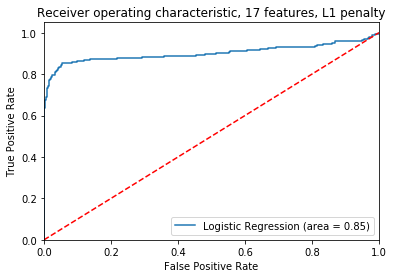

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1064
         1.0       0.96      0.70      0.81       312

   micro avg       0.93      0.93      0.93      1376
   macro avg       0.94      0.85      0.88      1376
weighted avg       0.93      0.93      0.92      1376
 Score =  0.9265988372093024


In [9]:
# changing penatly to l1 instead of default l2, liblinear solver
logreg5 = linear_model.LogisticRegression(penalty='l1', random_state=1)
logreg5.fit(full_feature_train, np.ravel(full_reaction_train))

predictions5 = logreg5.predict(full_feature_test)
score5 = logreg5.score(full_feature_test, full_reaction_test)

logit_roc_auc = roc_auc_score(full_reaction_test, logreg5.predict(full_feature_test))
fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg5.predict_proba(full_feature_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features, L1 penalty')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(full_reaction_test, predictions5), 'Score = ', score5)

In [10]:
# 17 features, selected liblinear solver and l1, balancing class weights because of low number of instances of some enzyme classes
model_1 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
model_1.fit(full_feature_train, np.ravel(full_reaction_train))

predictions = model_1.predict(full_feature_test) # change me to the data you want to predict based on 

score = model_1.score(full_feature_test, full_reaction_test)
pred = model_1.predict_proba(full_feature_test)



prediction_values = pd.DataFrame(pred)
model_descriptive_df = pd.DataFrame()
model_descriptive_df['0']=prediction_values[0]
model_descriptive_df['1']=prediction_values[1]
model_descriptive_df.head(), score, pred
print(classification_report(full_reaction_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1064
         1.0       0.81      0.83      0.82       312

   micro avg       0.92      0.92      0.92      1376
   macro avg       0.88      0.89      0.88      1376
weighted avg       0.92      0.92      0.92      1376



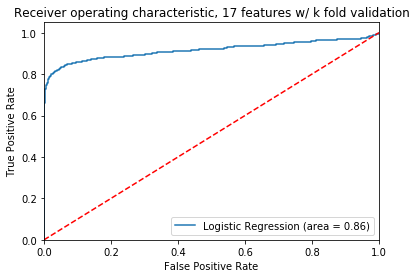

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5410
         1.0       0.97      0.73      0.84      1469

   micro avg       0.94      0.94      0.94      6879
   macro avg       0.95      0.86      0.90      6879
weighted avg       0.94      0.94      0.94      6879
 Score =  0.9387992440761739


In [11]:
# k fold cross validation


# need to create new features without train/test split
cv_features = master_df.iloc[:,7:24]
cv_features = np.array(cv_features) #shape balance array for regression
cv_reactions = list(master_df['reacts'])

model_2 = linear_model.LogisticRegressionCV(solver='liblinear', penalty='l1', random_state=1, cv=10, max_iter=1000)
model_2.fit(cv_features, np.ravel(cv_reactions))
predictions2 = model_2.predict(cv_features)
score2 = model_2.score(cv_features, cv_reactions)

logit_roc_auc = roc_auc_score(cv_reactions, model_2.predict(cv_features))
fpr, tpr, thresholds = roc_curve(cv_reactions, model_2.predict_proba(cv_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features w/ k fold validation')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

print(classification_report(cv_reactions, predictions2), 'Score = ', score2)

In [12]:
# recursive feature elimination model with all 17 features
rfe_results17 = pd.DataFrame(columns=['score']) 

rank_array17 = np.zeros((17,18))

for i in range(1,17):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(full_feature_train, np.ravel(full_reaction_train))
    score = rfe.score(full_feature_test, full_reaction_test)

    rfe_results17.loc[i, 'score'] = score
    for j in range(0,17):  
        rank_array17[i, j]= rfe.ranking_[j]

rank_df17 = pd.DataFrame(rank_array17, columns=['dist', 'class_1', 'class_2', 'class_3',
       'class_4', 'class_5', 'class_6', 'class_7',
       'n_C', 'n_H', 'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'MW', 'drop'])
#rfe_results
rank_df17.drop(rank_df17.index[0], inplace=True)
rank_df17.drop(['drop'], axis=1, inplace=True)
make_df17 = pd.DataFrame(rank_df17.sum(axis=0), columns=['score'])
make_df17.sort_values('score', axis=0, inplace=True)

In [13]:
make_df17

,score
dist,16.0
class_4,17.0
class_5,19.0
n_X,22.0
class_3,26.0
class_2,31.0
n_S,37.0
DoU,44.0
n_N,52.0
n_O,61.0


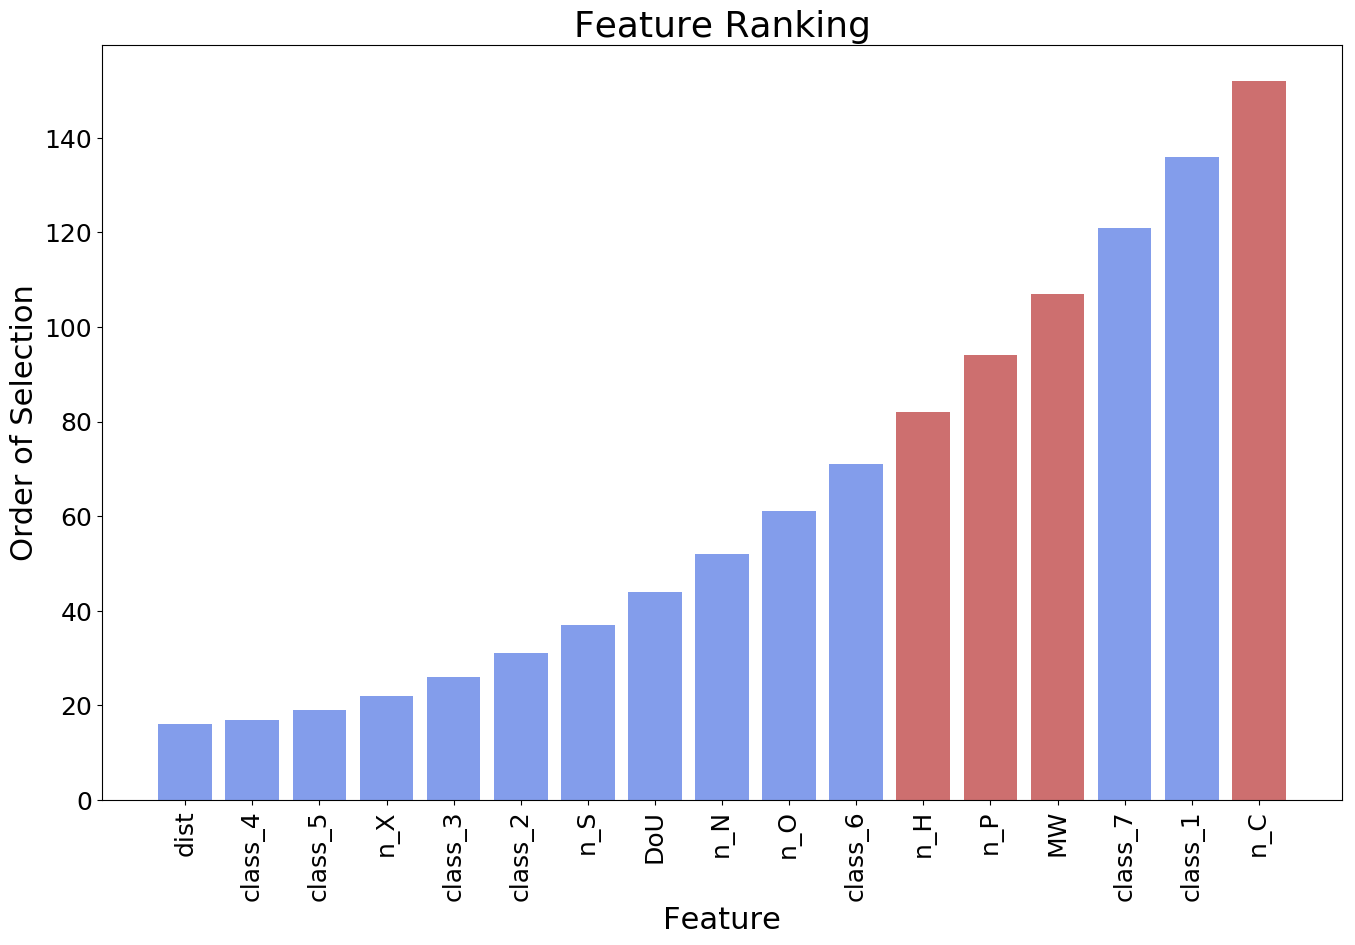

In [14]:
# plot of model feature importance with all 17
a = 'firebrick'
b = 'royalblue'
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 100)
ax.bar(x=make_df17.index, y=0, height=make_df17.score, color=[b,b,b,b,b,b,b,b,b,b,b,a,a,a,b,b,a], alpha=0.65, linewidth=18)
ax.set_title('Feature Ranking', fontsize=26)
ax.set_ylabel('Order of Selection', fontsize=22)
ax.set_xlabel('Feature', fontsize=22)
ax.set_xticklabels(labels=make_df17.index, fontsize=18, rotation='vertical')
ax.set_yticklabels(labels=['0','20','40','60','80','100','120','140'],fontsize=18)

plt.show()
fig.savefig('Feature Rankings.png')

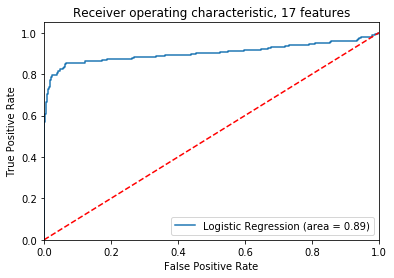

In [15]:
# roc/auc for 17 feature model
logreg17 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
logreg17.fit(full_feature_train, np.ravel(full_reaction_train))

logit_roc_auc = roc_auc_score(full_reaction_test, logreg17.predict(full_feature_test))

fpr, tpr, thresholds = roc_curve(full_reaction_test, logreg17.predict_proba(full_feature_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 17 features')
plt.legend(loc="lower right")

#plt.savefig('Log_ROC_17')
plt.show()

____________

In [16]:
# 14 features
rfe_results14 = pd.DataFrame(columns=['score']) 

rank_array14 = np.zeros((14,15))

for i in range(1,14):
    logreg2=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg2, i)
    rfe = rfe.fit(feature_train, np.ravel(reaction_train))
    score = rfe.score(feature_test, reaction_test)

    rfe_results14.loc[i, 'score'] = score
    for j in range(0,14):  
        rank_array14[i, j] = rfe.ranking_[j]
        
        
rank_df14 = pd.DataFrame(rank_array14, columns=['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_O', 'n_N', 'n_P', 'n_S', 'n_X', 'DoU', 'drop'])
#rfe_results
rank_df14.drop(rank_df14.index[0], inplace=True)
rank_df14.drop(['drop'], axis=1, inplace=True)
rank_df14.sum(axis=0) # lower score is better

dist               13.0
enzyme_class_1    104.0
enzyme_class_2     28.0
enzyme_class_3     23.0
enzyme_class_4     14.0
enzyme_class_5     16.0
enzyme_class_6     68.0
enzyme_class_7     91.0
n_O                58.0
n_N                49.0
n_P                79.0
n_S                34.0
n_X                19.0
DoU                41.0
dtype: float64

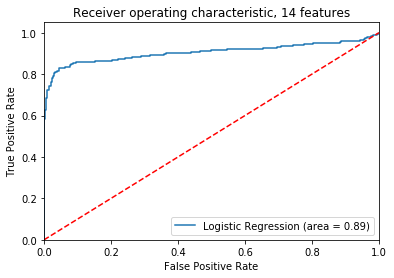

In [17]:
# roc/auc for 14 feature model
logreg14 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
logreg14.fit(feature_train, np.ravel(reaction_train))

logit_roc_auc = roc_auc_score(reaction_test, logreg14.predict(feature_test))

fpr, tpr, thresholds = roc_curve(reaction_test, logreg14.predict_proba(feature_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 14 features')
plt.legend(loc="lower right")

#plt.savefig('Log_ROC_14')
plt.show()

___________

In [18]:
# 13 features (Final model)

feature_13 = master_df.iloc[:,7:24]
feature_13.drop(['n_C', 'n_P', 'MW', 'n_H'], axis=1, inplace=True)

features_13 = np.array(feature_df) #shape balance array for regression
reactions_13 = list(master_df['reacts'])

feature_train13, feature_test13, reaction_train13, reaction_test13 = train_test_split(features_13, reactions_13,
                                                    test_size=0.20, random_state=42)

rfe_results13 = pd.DataFrame(columns=['score']) 

rank_array13 = np.zeros((13,14))

for i in range(1,13):
    logreg13=linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, max_iter=1000, class_weight='balanced') 

    rfe = RFE(logreg13, i)
    rfe = rfe.fit(feature_train13, np.ravel(reaction_train13))
    score = rfe.score(feature_test13, reaction_test13)

    rfe_results13.loc[i, 'score'] = score
    for j in range(0,13):  
        rank_array13[i, j] = rfe.ranking_[j]
        
        
rank_df13 = pd.DataFrame(rank_array13, columns=['dist', 'enzyme_class_1', 'enzyme_class_2', 'enzyme_class_3',
       'enzyme_class_4', 'enzyme_class_5', 'enzyme_class_6', 'enzyme_class_7',
       'n_O', 'n_N', 'n_S', 'n_X', 'DoU', 'drop'])
#rfe_results
rank_df13.drop(rank_df13.index[0], inplace=True)
rank_df13.drop(['drop'], axis=1, inplace=True)
rank_df13.sum(axis=0) # lower score is better

dist               12.0
enzyme_class_1    102.0
enzyme_class_2     27.0
enzyme_class_3     22.0
enzyme_class_4     13.0
enzyme_class_5     15.0
enzyme_class_6     67.0
enzyme_class_7     90.0
n_O                57.0
n_N                48.0
n_S                78.0
n_X                33.0
DoU                18.0
dtype: float64

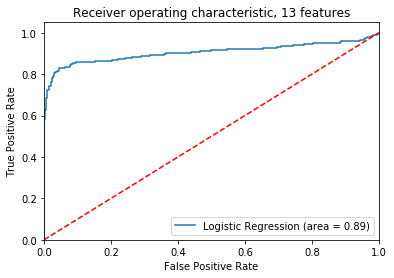

In [19]:
# roc/auc for 13 feature model
logreg13 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1, class_weight='balanced')
logreg13.fit(feature_train13, np.ravel(reaction_train13))

logit_roc_auc = roc_auc_score(reaction_test13, logreg13.predict(feature_test13))

fpr, tpr, thresholds = roc_curve(reaction_test13, logreg13.predict_proba(feature_test13)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, 13 features')
plt.legend(loc="lower right")

#plt.savefig('Log_ROC_14')
plt.show()